In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import vice
from astropy.io import fits
import seaborn as sns

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
import arya
from surp import gce_math as gcem

from surp import DATA_DIR

# Stars

In [4]:
def plot_cooh_errs(df, **kwargs):
    x = df["[o/h]"]
    y =  df["[c/o]"]
    xerr = df["[o/h]_err"]
    yerr = df["[c/o]_err"]
    filt = ~(np.isnan(xerr) | np.isnan(yerr))
    
    plt.errorbar(x[filt], y[filt], xerr=xerr[filt], yerr=yerr[filt], fmt="o", capsize=0, **kwargs)
    plt.xlabel("[O/H]")
    plt.ylabel("[C/O]")

In [5]:
amarsi19 = pd.read_csv(DATA_DIR + "amarsi_19.tsv", delimiter="\t *", comment="#", skiprows=[62, 63],)
amarsi19["[o/h]"] = amarsi19["[O/H]3N"]
amarsi19["[c/h]"] = amarsi19["[C/H]3N"]
amarsi19["[c/o]"] = amarsi19["[c/h]"] - amarsi19["[o/h]"] 

amarsi19["[o/h]_err"] = amarsi19["e_[O/H]3N"]
amarsi19["[c/h]_err"] = amarsi19["e_[C/H]3N"]
amarsi19["[c/o]_err"] = amarsi19["[o/h]_err"] + amarsi19["[c/h]_err"] 
amarsi19["[o/fe]"] = -amarsi19["[Fe/H]3L"] + amarsi19["[o/h]"]
amarsi19_sun = amarsi19.iloc[151]
amarsi19.drop(index=151, inplace=True)

/tmp/slurmtmp.27749531/ipykernel_82614/290246747.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  amarsi19 = pd.read_csv(DATA_DIR + "amarsi_19.tsv", delimiter="\t *", comment="#", skiprows=[62, 63],)


- \[Fe/H\]3L      7.4962
- C/H\]1N       8.4333
- \[O/H\]3N       8.6754

Amarsi is a reanalysis of nissen 2014 and nissen 2007, uses nlte 3d models

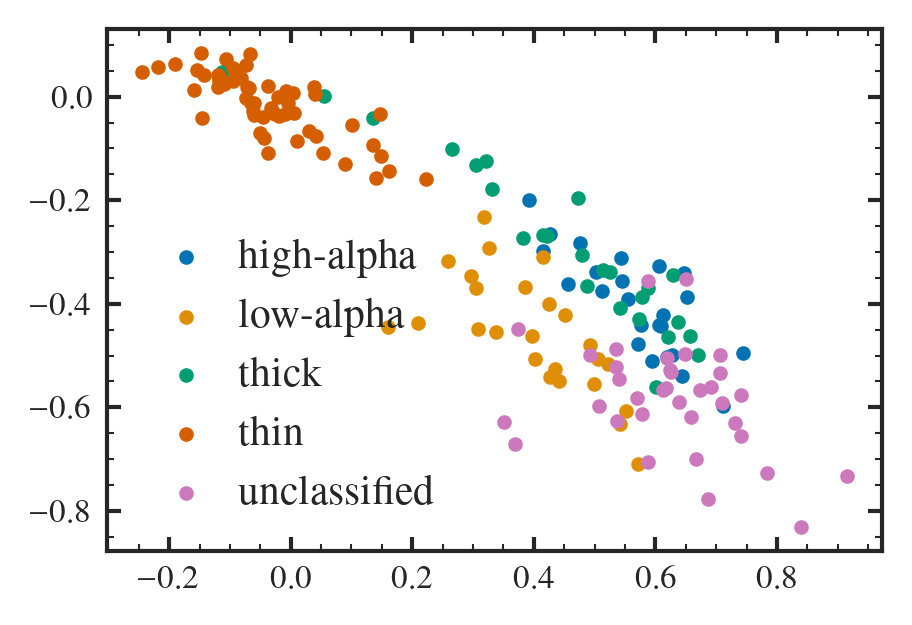

In [55]:
for pop in amarsi19.Pop.unique():
    filt = amarsi19.Pop == pop
    plt.scatter(amarsi19[filt]["[o/fe]"], amarsi19[filt]["[c/o]"], label=pop)
plt.legend()

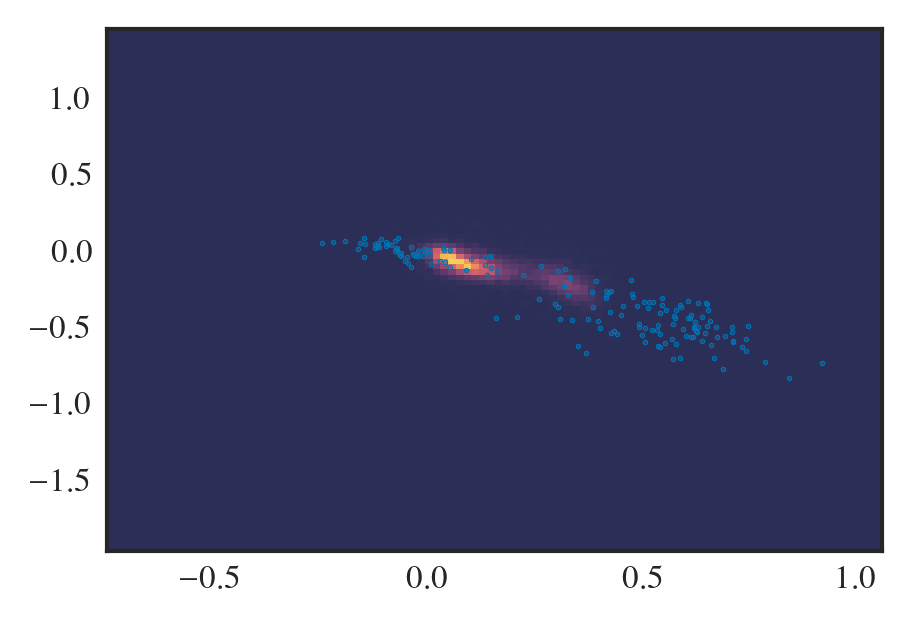

In [42]:
plt.hist2d(surp.subgiants.MG_FE, surp.subgiants.C_MG, 100)
plt.scatter(amarsi19["[o/fe]"], amarsi19["[c/o]"], s=0.1)


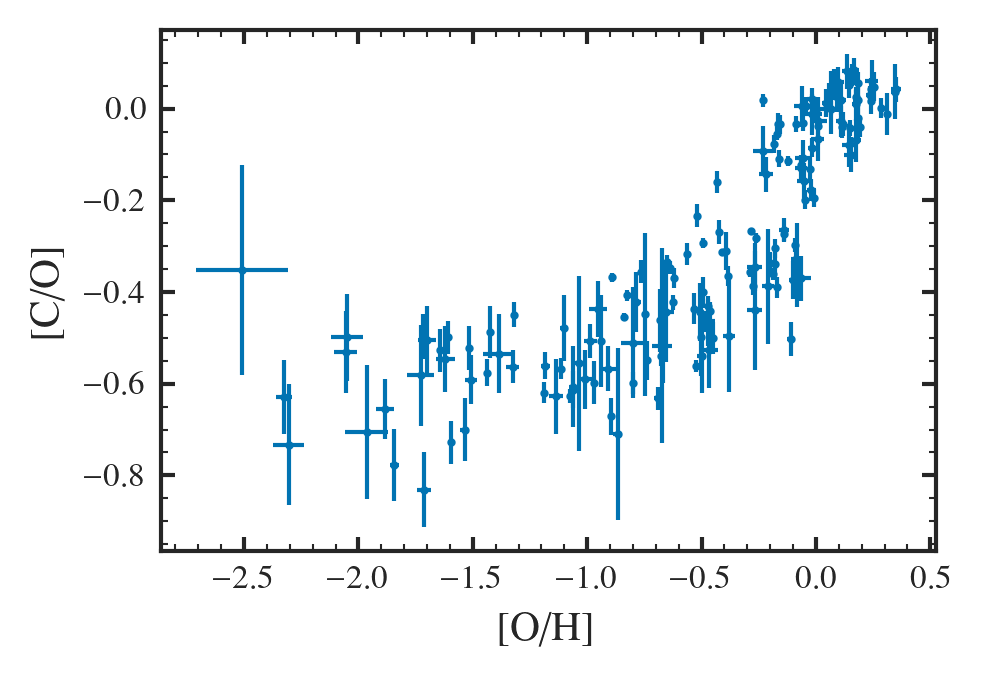

In [6]:
plt.figure(dpi=300)
plot_cooh_errs(amarsi19, ms=1)

verified

In [7]:
b18 = pd.read_csv(DATA_DIR + "bedell18.dat", delimiter=" +", comment="#")

/tmp/slurmtmp.27749531/ipykernel_82614/51954004.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  b18 = pd.read_csv(DATA_DIR + "bedell18.dat", delimiter=" +", comment="#")


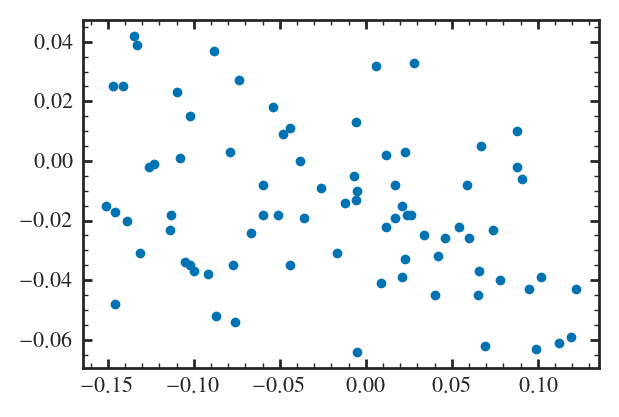

In [8]:
plt.scatter(b18["[OI/H]"], b18["[CI/H]"] - b18["[OI/H]"])

In [9]:
dm21 = pd.read_csv(DATA_DIR + "dm21.csv", delimiter="\t *", comment="#")
dm21["[o/h]"] = dm21["[O1/Fe]"] + dm21["[Fe/H]"]
dm21["[c/o]"] = dm21["[C/O1]"]

/tmp/slurmtmp.27749531/ipykernel_82614/2279646798.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dm21 = pd.read_csv(DATA_DIR + "dm21.csv", delimiter="\t *", comment="#")


In [10]:
bensby21 = pd.read_csv(DATA_DIR + "bensby21.tsv", delimiter="\t *", comment="#",)
bensby19 = pd.read_csv(DATA_DIR + "bensby19.tsv", delimiter="\t *", comment="#",)

bensby = bensby21.set_index("Name").join(bensby19.set_index("Name"),rsuffix="_b19", how="left")

bensby["[c/o]"] = bensby["[C/H]"] - bensby["[O/H]"]
bensby["[o/fe]"] = bensby["[O/H]"] - bensby["[Fe/H]"]
bensby["[o/h]"] = bensby["[O/H]"]
bensby["[c/o]_err"] = bensby["e_[C/O]"]
bensby["[o/h]_err"] = bensby["e_[O/H]"]

/tmp/slurmtmp.27749531/ipykernel_82614/2765116819.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bensby21 = pd.read_csv(DATA_DIR + "bensby21.tsv", delimiter="\t *", comment="#",)
/tmp/slurmtmp.27749531/ipykernel_82614/2765116819.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bensby19 = pd.read_csv(DATA_DIR + "bensby19.tsv", delimiter="\t *", comment="#",)


(1.0, -0.5)

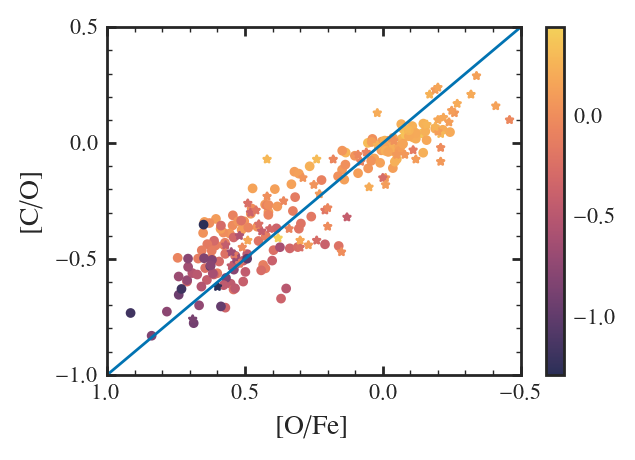

In [11]:
plt.scatter(amarsi19["[o/fe]"], amarsi19["[c/o]"], c=amarsi19["[o/h]"], clim=(-2.5, 0.5))
plt.scatter(bensby["[o/fe]"], bensby["[c/o]"], c=bensby["[O/H]"], marker="*")
plt.colorbar()
plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")
plt.gca().invert_xaxis()
plt.plot([-1, 1], [1, -1])
plt.ylim(-1, 0.5)
plt.xlim(1, -0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '[C/$\\alpha$]')

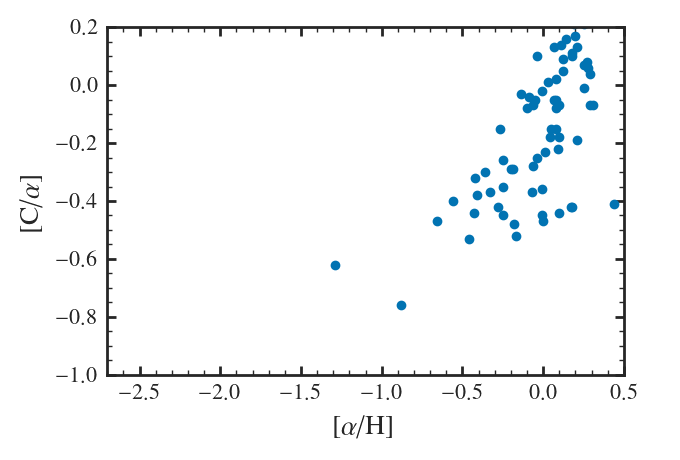

In [12]:
plt.xlim(-2.7, 0.5)

plt.scatter(bensby["[O/H]"], bensby["[c/o]"])
arya.Legend(loc=-1)
plt.ylim(-1, 0.2)
plt.xlabel("[$\\alpha$/H]")
plt.ylabel("[C/$\\alpha$]")

In [13]:
berg19 = pd.read_csv(DATA_DIR + "berg19.csv")
berg19 = berg19.iloc[:-1]
berg19["[c/o]"] = gcem.log_to_brak(berg19.log_c_o, "c", "o")
berg19["[o/h]"] = gcem.eps_to_brak(berg19.eps_o, "o")
berg19["[c/o]_err"] = berg19.log_c_o_err
berg19["[o/h]_err"] = berg19.eps_o_err

In [14]:
berg16 = pd.read_csv(DATA_DIR + "berg16.csv")
berg16["[c/o]"] = gcem.log_to_brak(berg16.log_c_o, "c", "o")
berg16["[o/h]"] = gcem.eps_to_brak(berg16.eps_o, "o")
berg16["[c/o]_err"] = berg16.log_c_o_err
berg16["[o/h]_err"] = berg16.eps_o_err

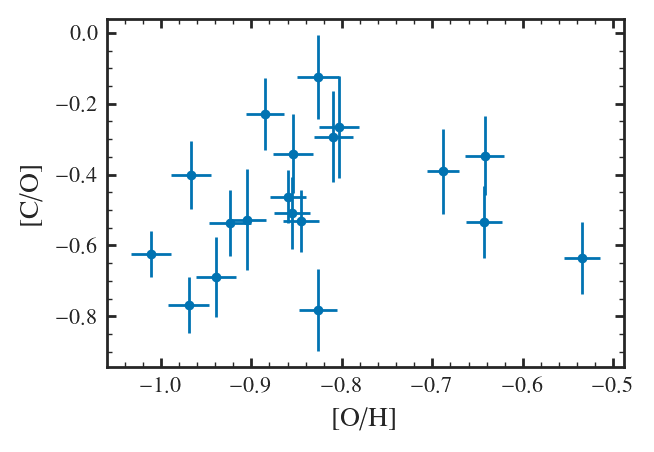

In [15]:
plot_cooh_errs(berg19)

verified

In [16]:
plt.rcParams["figure.dpi"] = 300

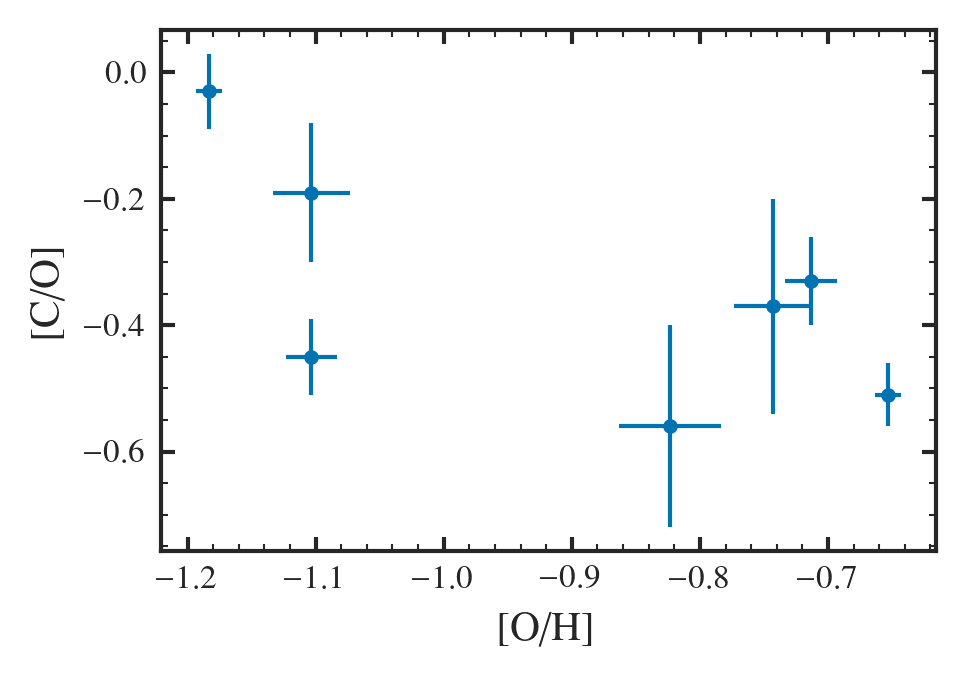

In [17]:
plot_cooh_errs(berg16)

Not consistant with B19 figures

In [18]:
cooke17 = pd.read_csv(DATA_DIR + "cooke17.csv")

cooke17["[c/o]"] = cooke17.c_o
cooke17["[c/o]_err"] = cooke17.c_o_err
cooke17["[o/h]"] = cooke17.o_h
cooke17["[o/h]_err"] = cooke17.o_h_err


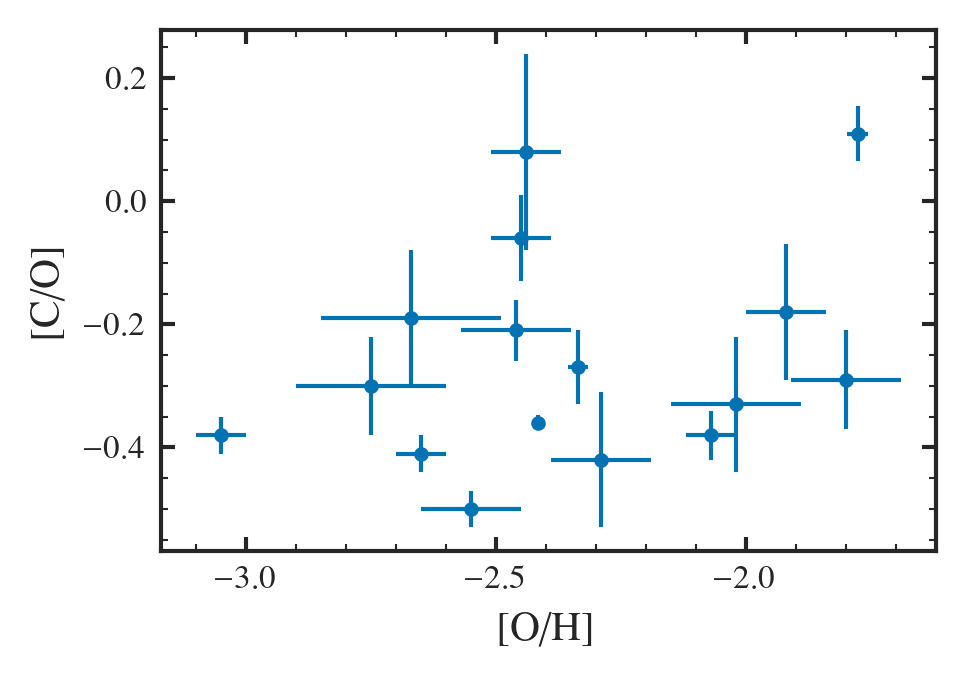

In [19]:
plot_cooh_errs(cooke17)

verified :)

1: Cooke et al. (2015); 2: Dutta et al. (2014); 3: Cooke et al. (2014); 4: Ellison et al. (2010); 5: Cooke et al. (2011b); 6: This work; 7: Pettini et al. (2008); 8: Morrison et al. (2016); 9: Srianand et al. (2010); 10: Cooke et al. (2012); 11: Dessauges-Zavadsky et al. (2003).

In [20]:
RL = pd.read_csv(DATA_DIR + "extragalactic_RL.csv", sep="\s+")
RL["[c/o]"] = gcem.log_to_brak(RL.eps_c - RL.eps_o, "c", "o")
RL["[o/h]"] = gcem.eps_to_brak(RL.eps_o, "o")
RL["[c/o]_err"] = np.sqrt(RL.c_err**2 + RL.o_err**2)
RL["[o/h]_err"] = RL.o_err 

In [21]:
RL.drop(np.where(np.isin(RL["object"], ["VS-24", "VS-38", "NGC-5447"]))[0], inplace=True)


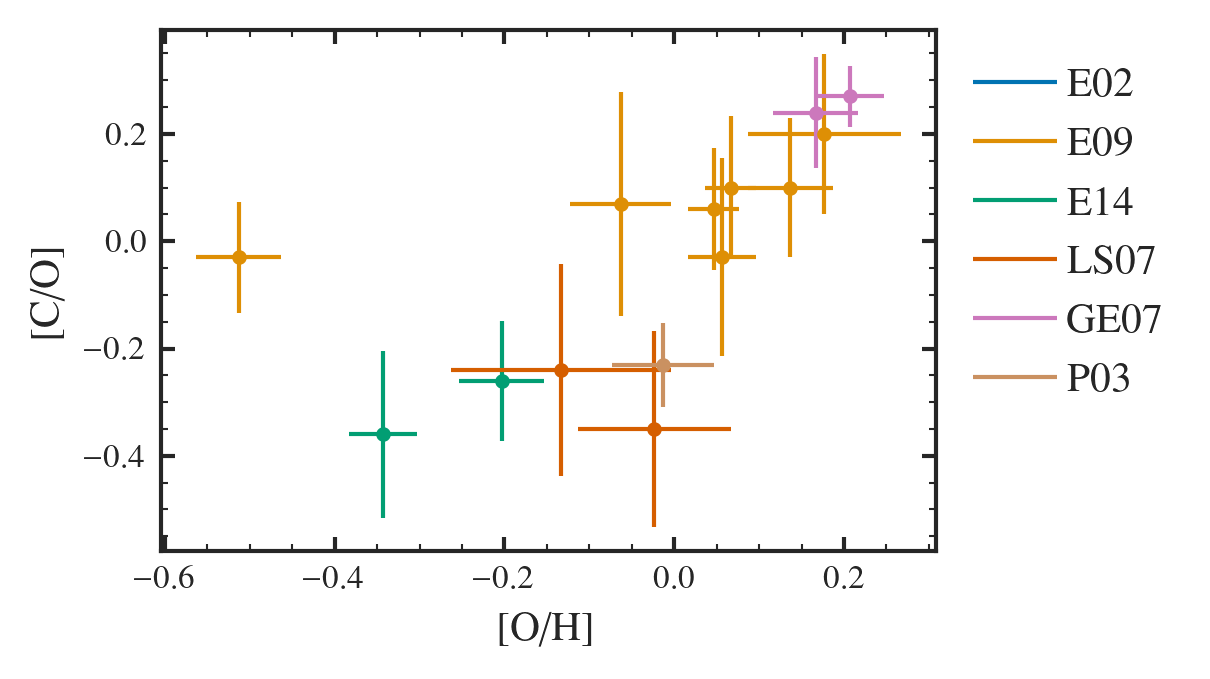

In [22]:
for label in RL.source.unique():
    df = RL.loc[RL.source == label]

    plot_cooh_errs(df, label=label)
    
arya.Legend(loc=-1)

Verified E09, E14, P03. Dropped E02, and NGC5447

In [23]:
flf21 = pd.read_csv(DATA_DIR + "FLF21.csv", delimiter="\s+", comment="#")
flf21["[o/h]"] = flf21["[O/Fe]"] + flf21["[Fe/H]"]
flf21["[c/o]"] = flf21["[C/Fe]"] - flf21["[O/Fe]"]

# NOT COMPARABLE SAMPLE< HAS GIANTZ

In [24]:
F09 = pd.read_csv(DATA_DIR + "Fabbian09.csv", sep="\s+")

Redshift: (Pettini et al. 2000;
Fosbury & Villar-Martín et al. 2003; Erb et al. 2010; Christensen
et al. 2012; Bayliss et al. 2014; James et al. 2014; Stark et al.
2014; Steidel et al. 2016; Vanzella et al. 2016; Amorín et al.
2017; Berg et al. 2018; Rigby et al. 2018)

RL: (teal squares: Esteban et al. 2002, 2009,
2014; Pilyugin & Thuan 2005; García-Rojas & Esteban 2007;
López-Sánchez et al. 2007).

CL: Senchyna et al. (2017) and Peña-Guerrero et al. (2017)

MW stars: Gustafsson et al. (1999), Akerman
et al. (2004), Fabbian et al. (2009), and Nissen et al. (2014)

In [25]:
def read_skillman20():
    df = pd.read_csv(DATA_DIR + "chaos_m101.dat", sep="\s+")
    df1 = pd.DataFrame()
    df1["[o/h]"] = gcem.eps_to_brak(df["O_H"], "o")
    df1["[c/o]"] = gcem.log_to_brak(df["C_O"], "c", "o")
    df1["[c/n]"] = gcem.log_to_brak(df["C_N"], "c", "n")
    df1["[n/o]"] = df1["[c/o]"] - df1["[c/n]"]

    df1["[o/h]_err"] = df["O_H_err"]
    df1["[c/o]_err"] = df["C_O_err"] 
    df1["[c/n]_err"] = df["C_N_err"] * 12/14
    df1["[n/o]_err"] = df["C_O_err"] + df["C_N_err"]

    df1.name="M101"
    return df1

skillman20 = read_skillman20()

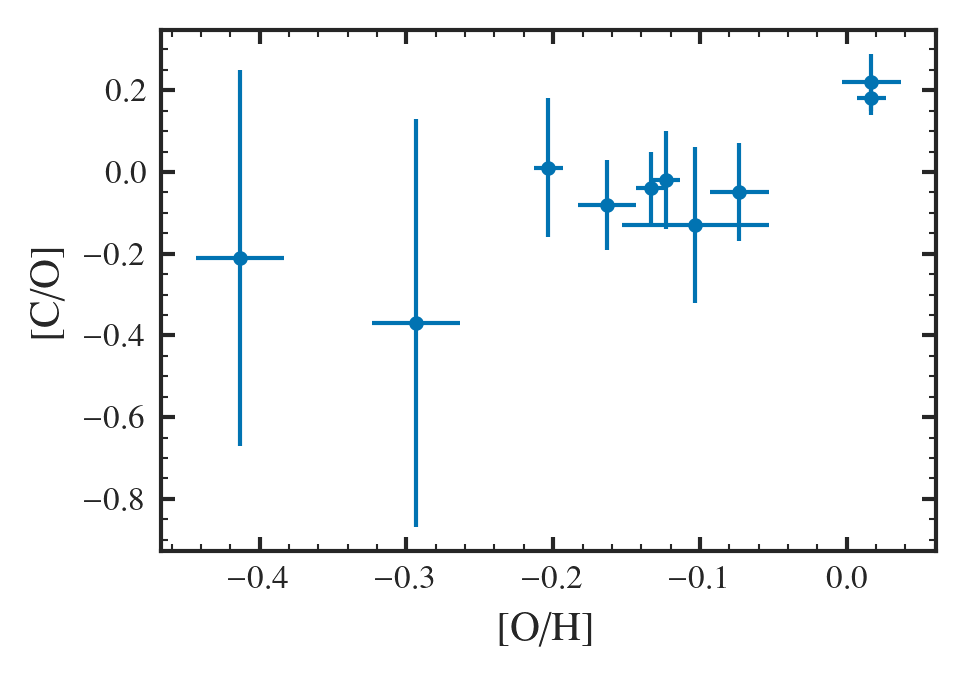

In [26]:
plot_cooh_errs(skillman20)

verified, maybe 0.01 dex errors?

In [27]:
def read_md22():
    df = pd.read_csv(DATA_DIR + "md22.csv")
    df1 = pd.DataFrame()
    df1["[o/h]"] = gcem.eps_to_brak(df["O_H"], "o")
    df1["[c/h]"] = gcem.eps_to_brak(df["C_H"], "c")
    df1["[n/h]"] = gcem.eps_to_brak(df["N_H"], "n")

    df1["[c/n]"] = df1["[c/h]"] - df1["[n/h]"]
    df1["[c/o]"] = df1["[c/h]"] - df1["[o/h]"]
    df1["[n/o]"] = df1["[n/h]"] - df1["[o/h]"]

    df1["[o/h]_err"] = df["O_H_err"]
    df1["[c/o]_err"] = df["C_H_err"] + df["O_H_err"]
    df1["[n/o]_err"] = df["N_H_err"] + df["O_H_err"]
    df1["[c/n]_err"] = df["C_H_err"] + df["N_H_err"]

    df1.name = "Milkyway"
    return df1
md22 = read_md22()
md22a = pd.read_csv(DATA_DIR + "md22.csv")


Text(0, 0.5, 'eps C')

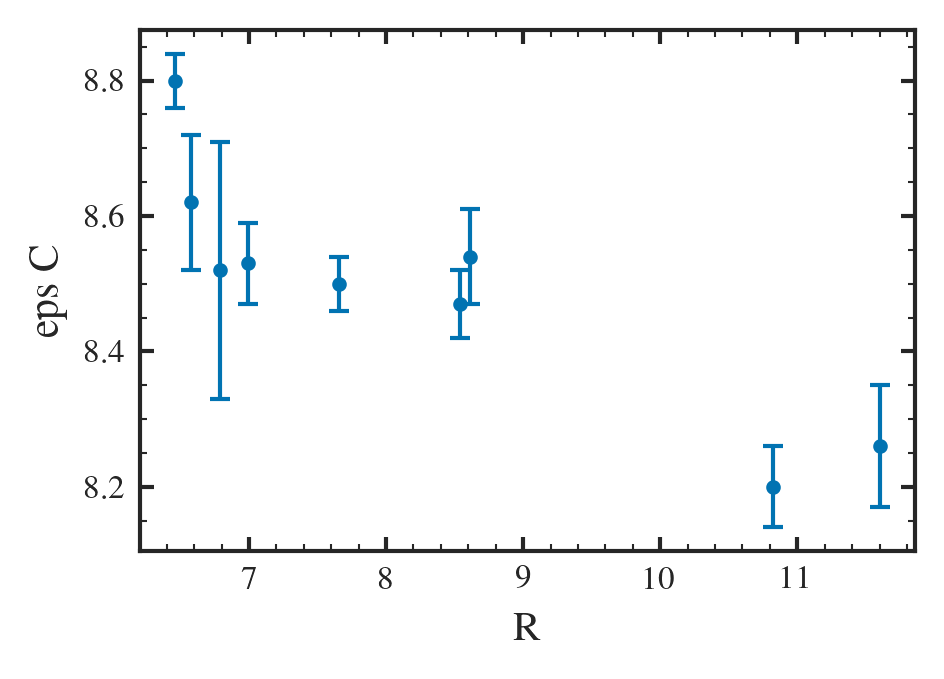

In [28]:
plt.errorbar(md22a.R_g, md22a.C_H, yerr=md22a.C_H_err, fmt="o")
plt.xlabel("R")
plt.ylabel("eps C")

Text(0, 0.5, 'eps(O)')

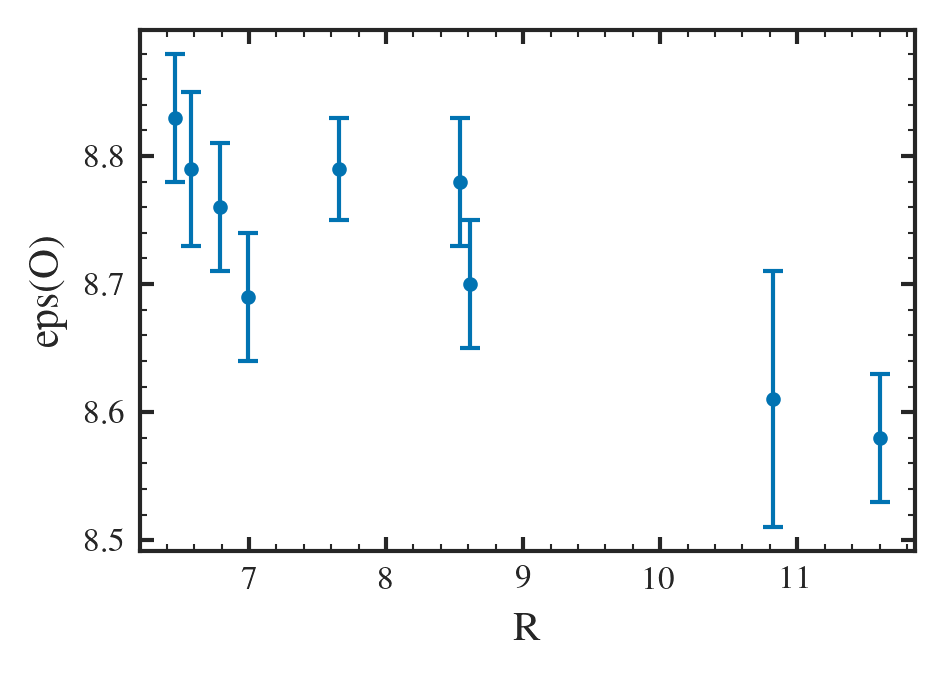

In [29]:
plt.errorbar(md22a.R_g, md22a.O_H, yerr=md22a.O_H_err, fmt="o")
plt.xlabel("R")
plt.ylabel("eps(O)")

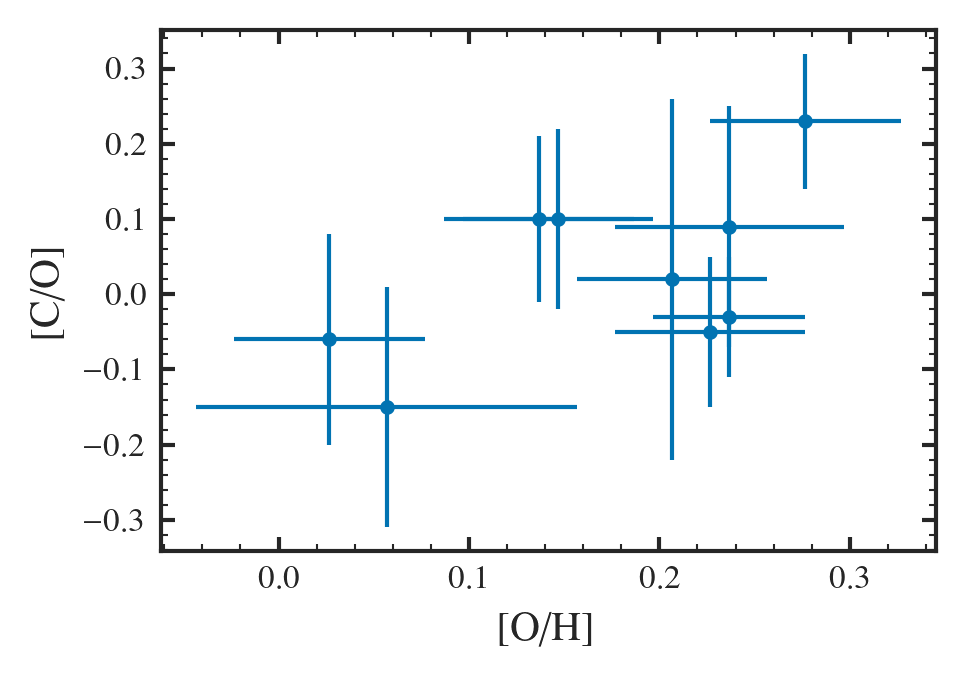

In [30]:
plot_cooh_errs(md22)

Verified: MD22 is all MW recombination lines in HII

In [31]:
all_abundances = pd.DataFrame(columns=["[c/o]", "[c/o]_err", "[o/h]", "[o/h]_err", "type"])


for df, label in [(RL, "RL"), (berg19, "dwarf"), (md22, "RL"), 
                  (cooke17, "DLA"), (amarsi19, "star")]: #, (bensby, "star") (skillman20, "RL")
    all_abundances = pd.concat([
        all_abundances, 
        pd.DataFrame({
        "[c/o]": df["[c/o]"],
        "[c/o]_err": df["[c/o]_err"],
        "[o/h]": df["[o/h]"],
        "[o/h]_err": df["[o/h]_err"],
        "type": [label]*len(df)
    })], ignore_index=True)


/tmp/slurmtmp.27749531/ipykernel_82614/802899087.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_abundances = pd.concat([


[ 82 239]


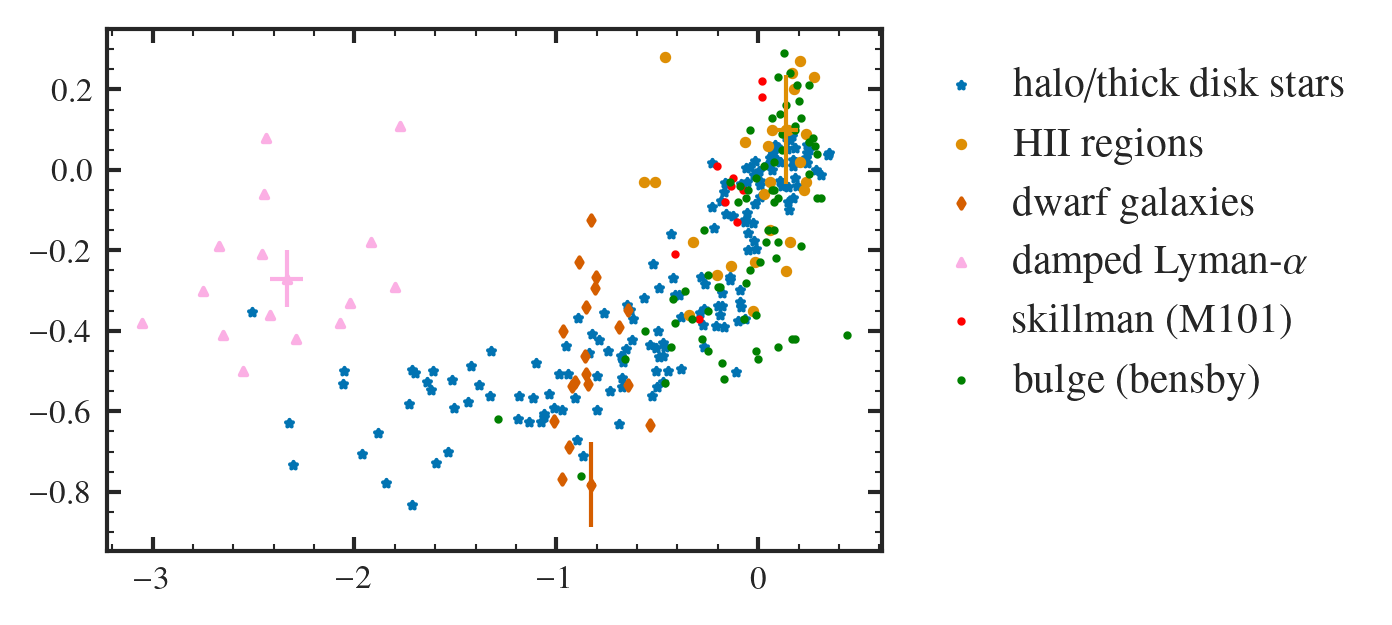

In [32]:
plt.figure(dpi=300)
for i in [2,0,1,3]:
    label = ["HII regions", "dwarf galaxies", "halo/thick disk stars", "damped Lyman-$\\alpha$"][i]
    val = ["RL", "dwarf", "star", "DLA"][i]
    color = arya.style.COLORS[[1, 3, 0, 6][i]]
    marker = ["o", "d", "*", "^"][i]
    
    df = all_abundances[all_abundances.type == val]

    
    plt.scatter(df["[o/h]"], df["[c/o]"], label=label, 
               marker=marker, s=3, color=color)
    
    e_idx = np.intersect1d(df.index, [68, 36, 2, 82, 239])
    if len(e_idx) == 1:
        x_err = np.mean(df["[o/h]_err"])
        y_err = np.mean(df["[c/o]_err"])
        plt.errorbar(df["[o/h]"][e_idx], df["[c/o]"][e_idx], xerr=x_err, yerr=y_err, 
                     markersize=0, color=color, capsize=0)
    else:
        print(e_idx)
        
plt.scatter(skillman20["[o/h]"], skillman20["[c/o]"], s=1, color="r", label="skillman (M101)")
plt.scatter(bensby["[o/h]"], bensby["[c/o]"], s=1, color="g", label="bulge (bensby)")

arya.Legend(loc=-1)

In [33]:
all_abundances.to_csv("all_data.csv")